## **Preamble**
Title: Powerball Winners Data (2021)

Author: Ashish Acharya

Email: ashishacharya0@gmail.com

Last Update: 2021-09-29

## **Introduction**
This report analyses the Powerball winners numbers in 2020. Data for this report was obtained from information published by lotto.net.


## **Dataset**
The dataset for this report was built from informaton published daily at [Powerball Numbers from 2020](https://www.lotto.net/powerball/numbers/2020). Web scraping techniques were employed to compile the winning numbers. 

About Powerball: Powerball is an America lottery game in which a player picks 5 numbers from [1-69] and 1 number from [1-26] for a given drawing. They have options for powerplay which adds to the jackpot. The more numbers a player matches to the jackpot number, the bigger the payout.

I have chosen 2020 as the data to work with because it shows a complete picture of how the drawing pool looks like at the end of a year.

The script below automatically extracts Winning numbers. The information is saved in a json file (powerball_numbers_data.json) with the following structure:
```
[
  {"date": "December 30th 2020", "numbers": [3,43,45,61,65]},
  ...
  {"date": "January 1st 2020", "numbers": [49,53,57,59,62]}
]
```



In [24]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: data collection
# Author: Ashish Acharya

from bs4 import BeautifulSoup
from google.colab import drive
from datetime import datetime, timedelta
import requests
import json
import time

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/powerball_numbers_data/'
DATASET_NAME = 'powerball_numbers_data.json'
BASE_URL = 'https://www.lotto.net/powerball/numbers/2020'
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
records = [] #dict for json dump
winning_numbers_list = []
# Google drive mount
# drive.mount('/content/drive')

result = requests.get(BASE_URL)
# 200 means its successful
if result.status_code == 200:
  soup = BeautifulSoup(result.content, 'html.parser')
  #to check if you actually got anything
  #print(soup) 

  #the information for 1 drawing - 5 winning numbers & the powerball number
  # are stored in the results-vsmall archive list.
  # we find all of them and extract data from them
  divs = soup.find_all('div', class_="results-vsmall archive-list")
  for div in divs:
    #print to check what you are working with
    #print(div)  

    #There is an unwanted information "Day", the day on which the numbers were drawn
    #we use extract to remove it and just get Month, Date and Year
    date = div.find('div', class_='date')
    unwanted = date.find('span')
    unwanted.extract()
    #there is a newline character before the date so we strip it
    date = date.text.strip()
    #print("Date:", date)

    #this holds the 5 winning numbers
    winning_numbers = div.find_all('li', class_='ball ball')

    #printing the 5 winning numbers
    for numbers in winning_numbers:
      winning_number = numbers.text
      winning_numbers_list.append(int(winning_number))
      #print("Winning Number:", winning_number)
    #print(winning_numbers_list)
   
    #printing the powerball number
    powerball_number = div.find('li', class_='ball power-play')
    span = powerball_number.find('span') #span holds the power-ball number
    span = int(span.text)
    #print("Powerball Number:", span.text)

    #write numbers to dictionary
    records.append({'date': date, 'numbers': winning_numbers_list[0:6]})
    #powerball numbers have been ommitted since their range is 1-26
    #which would need a separate handling of their own
    #just need duplicate code to append numbers[6] separately in later parts
    #of the code for statistics and graph
    #records[date].append(span)

    #reset list
    winning_numbers_list.clear()

  
print(records)

with open(DATA_FOLDER + DATASET_NAME, 'w') as json_file:
   json.dump(records, json_file, ensure_ascii=False, indent=2)


[{'date': 'December 30th 2020', 'numbers': [3, 43, 45, 61, 65]}, {'date': 'December 26th 2020', 'numbers': [10, 24, 27, 35, 53]}, {'date': 'December 23rd 2020', 'numbers': [6, 13, 38, 39, 53]}, {'date': 'December 19th 2020', 'numbers': [27, 32, 34, 43, 52]}, {'date': 'December 16th 2020', 'numbers': [4, 23, 37, 61, 67]}, {'date': 'December 12th 2020', 'numbers': [17, 54, 56, 63, 69]}, {'date': 'December 9th 2020', 'numbers': [11, 14, 31, 47, 48]}, {'date': 'December 5th 2020', 'numbers': [3, 4, 6, 48, 53]}, {'date': 'December 2nd 2020', 'numbers': [28, 31, 40, 41, 46]}, {'date': 'November 28th 2020', 'numbers': [8, 12, 18, 44, 51]}, {'date': 'November 25th 2020', 'numbers': [2, 57, 58, 60, 65]}, {'date': 'November 21st 2020', 'numbers': [51, 54, 57, 60, 69]}, {'date': 'November 18th 2020', 'numbers': [4, 5, 17, 43, 52]}, {'date': 'November 14th 2020', 'numbers': [7, 15, 18, 32, 45]}, {'date': 'November 11th 2020', 'numbers': [13, 15, 17, 45, 63]}, {'date': 'November 7th 2020', 'numbers

# Summary Statistics

In [65]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: summary statistics

import json
from google.colab import drive
from datetime import datetime, timedelta
import numpy as np

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/powerball_numbers_data/'
DATASET_NAME = 'powerball_numbers_data.json'

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

numbers = []
for record in records:
  for num in record['numbers']:
    numbers.append(num)
#print(numbers)
numbers_array = np.array(numbers)

print('*** Summary Statistics ***')
print(f'#records: {len(records)}')
# [1-69] is expected and it is what we get
print(f'Numbers range: [{np.min(numbers_array)},{np.max(numbers_array)}]')
print('Numbers mean: {:.2f}'.format(np.mean(numbers_array)))
print('Numbers median: {:.2f}'.format(np.median(numbers_array)))
print('Numbers std: {:.2f}'.format(np.std(numbers_array)))

*** Summary Statistics ***
#records: 105
Numbers range: [1,69]
Numbers mean: 35.25
Numbers median: 36.00
Numbers std: 19.92


# Visualizations

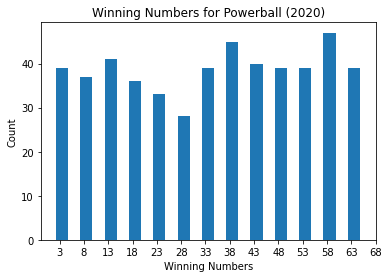

In [58]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: histogram

from google.colab import drive
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/powerball_numbers_data/'
DATASET_NAME = 'powerball_numbers_data.json'

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

numbers = []
for record in records:
  for num in record['numbers']:
    numbers.append(num)
#print(numbers)

bins = list(range(1, 69, 5))
counts, bins, _ = plt.hist(
    numbers, 
    bins=bins, 
    rwidth=0.5
)
xticks = [x+2 for x in bins]
axes = plt.gca() # get a reference to the plot's axes
axes.set_xticks(xticks)
plt.xlabel('Winning Numbers')
plt.ylabel('Count')
plt.title('Winning Numbers for Powerball (2020)')
plt.show()

*** Outliers ***


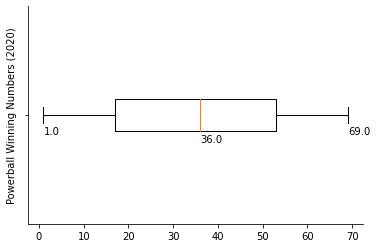

In [61]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: box plot

from google.colab import drive
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/powerball_numbers_data/'
DATASET_NAME = 'powerball_numbers_data.json'

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

numbers = []
for record in records:
  for num in record['numbers']:
    numbers.append(num)

bp = plt.boxplot(
    numbers, 
    vert=False
) 
for median in bp['medians']:
  xy = median.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)
    
for cap in bp['caps']:
  xy = cap.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)

min_whisker = bp['caps'][0].get_xydata()[0][0]
max_whisker = bp['caps'][1].get_xydata()[0][0]   

outliers = []
for record in records:
  for num in record['numbers']:
    if num < min_whisker or num > max_whisker:
      outliers.append(num)
print('*** Outliers ***')
for outlier in outliers:
  print(outlier)

axes = plt.gca()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_yticklabels([''])
plt.ylabel('Powerball Winning Numbers (2020)')

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


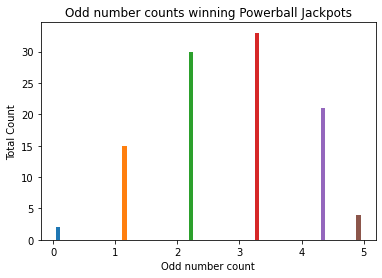

In [92]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: time series

#Another interesting way to look at the data is counting how many even/odd
#numbers were there in a given winning drawing.
#Here we have a plot of winning number sets in which there were
# 0 odd numbers, 1 odd numbers, .. all 5 odd numbers.

from google.colab import drive
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/powerball_numbers_data/'
DATASET_NAME = 'powerball_numbers_data.json'

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

odd0 = 0
odd1 = 0
odd2 = 0
odd3 = 0
odd4 = 0
odd5 = 0

odd = 0
for record in records:
  for num in record['numbers']:
    if num % 2 == 1:
      odd += 1
  if odd == 0:
    odd0 += 1
  if odd  == 1:
    odd1 += 1
  if odd == 2:
    odd2 += 1
  if odd == 3:
    odd3 += 1
  if odd == 4:
    odd4 += 1
  if odd == 5:
    odd5+=1
  
  odd = 0

oddlist = []
oddlist.append([0]*odd0)
oddlist.append([1]*odd1)
oddlist.append([2]*odd2)
oddlist.append([3]*odd3)
oddlist.append([4]*odd4)
oddlist.append([5]*odd5)
#print(oddlist)

#verify that the sum of these match the total records
# print(odd0)
# print(odd1)
# print(odd2)
# print(odd3)
# print(odd4)
# print(odd5)

bins = list(range(0, 5))
counts, bins, _ = plt.hist(
    oddlist
)

plt.xlabel('Odd number count')
plt.ylabel('Total Count')
plt.title('Odd number counts winning Powerball Jackpots')
plt.show()